In [1]:
import gensim
import os
import numpy as np

In [2]:
#ÏõåÎìú ÏûÑÎ≤†Îî© ÌååÏùº Í≤ΩÎ°ú
#filepath = os.path.join(os.getcwd(), 'word_embedding\\fasttext\\ko.bin')
#filepath

In [3]:
#ÏõåÎìú ÏûÑÎ≤†Îî© Î∂àÎü¨Ïò§Í∏∞
# from gensim.models import FastText as FT
# model = FT.load_fasttext_format(filepath)

In [4]:
#Í¥ÄÏã¨ÏÇ¨ Î¶¨Ïä§Ìä∏
preferences = [
    'Ïó¨Ìñâ', 'ÎÇöÏãú', 'Îì±ÏÇ∞',
    'ÏûêÏ†ÑÍ±∞', 'Ïö¥Îèô', 'Í≥®ÌîÑ',
    'Î∞òÎ†§ÎèôÎ¨º', 'ÏãùÎ¨º', 'Ï¢ÖÍµê',
    'ÎßõÏßë', 'ÏôÄÏù∏', 'Ïà†',
    'ÏòÅÌôî', 'ÏÇ¨ÏßÑ', 'ÎØ∏Ïà†',
    'ÎÖ∏Îûò', 'ÏùåÏïÖ', 'ÏïÖÍ∏∞',
    'Ï±Ö', 'Ìå®ÏÖò', 'Î∑∞Ìã∞',
    'Ìà¨Ïûê', 'Ïù∏ÌÖåÎ¶¨Ïñ¥', 'Í≤∞Ìòº']

In [5]:
#Ìï¥Îãπ ÏΩîÎìúÎäî ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Î•º ÏÇ¨Ïö©Ìï† Îïå Ïú†Ìö®Ìïú ÏΩîÎìúÏûÖÎãàÎã§. ÌèâÏÉÅÏãú ÏÇ¨Ïö©ÌïòÏßÄ ÏïäÏäµÎãàÎã§.
# preferences_loc = {}
# vectors = []
# for i in preferences:
#     preferences_loc[i] = model.wv.get_vector(i)
#     vectors.append(model.wv.get_vector(i))

In [6]:
import pickle
with open('embedding_dict.pickle', 'rb') as fw:
    preference_loc = pickle.load(fw)

In [7]:
with open('embedding_list.pickle', 'rb') as fw2:
    vectors = pickle.load(fw2)

In [8]:
#ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Î•º ÏãúÍ∞ÅÌôîÌïòÍ∏∞ ÏúÑÌï¥ 2Ï∞®ÏõêÏúºÎ°ú Ï∂ïÏÜåÌï©ÏãúÎã§ Î∞©Î≤ïÏùÄ ÎëêÍ∞ÄÏßÄ
#1.PCA
from sklearn.decomposition import PCA

pca = PCA(n_components= 2)
pca_vec = pca.fit_transform(vectors)

#2.TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_vec = tsne.fit_transform(vectors)

c:\Users\dgfs5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\dgfs5\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [9]:
tsne_vec.shape

(24, 2)

c:\Users\dgfs5\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


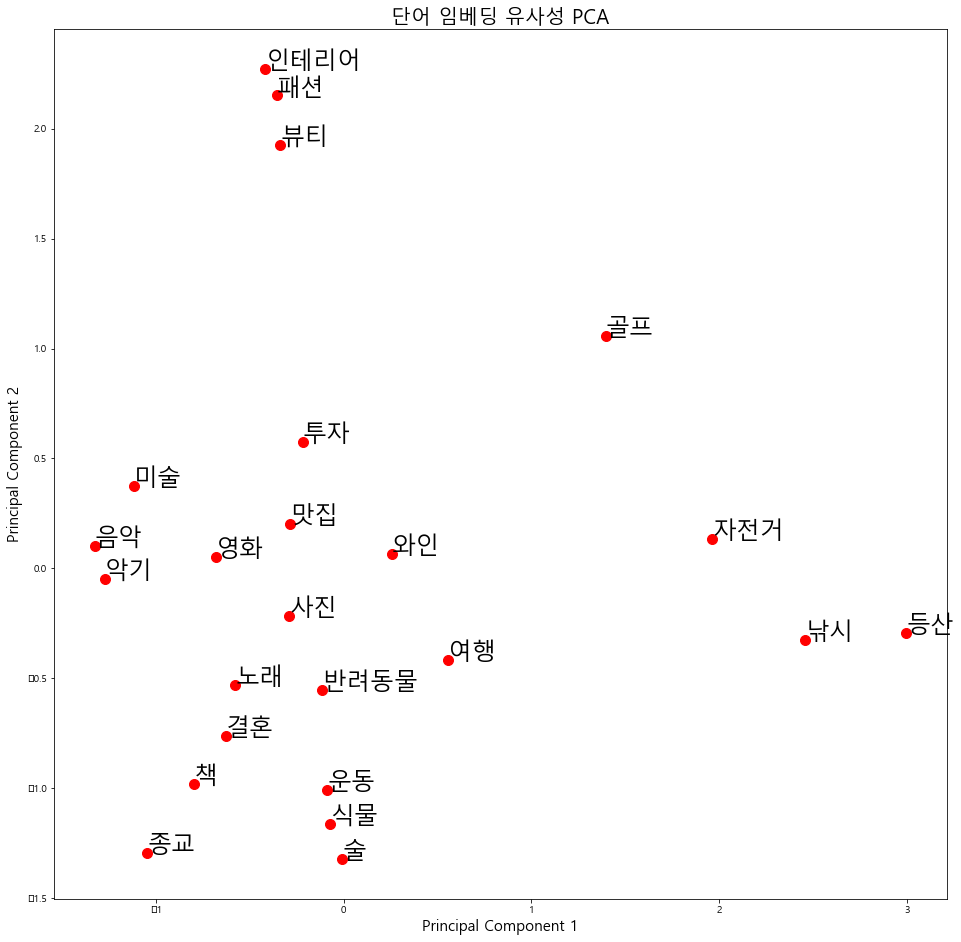

In [10]:
#ÏãúÍ∞ÅÌôî Ìï¥Î¥ÖÏãúÎãπ
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")

fig = plt.figure(figsize = (16, 16))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Îã®Ïñ¥ ÏûÑÎ≤†Îî© Ïú†ÏÇ¨ÏÑ± PCA', fontsize=20)

plt.scatter(pca_vec[:,0],pca_vec[:,1],s=100,color="red")
for i, label in enumerate(preferences):
    plt.annotate(label, (pca_vec[i][0], pca_vec[i][1]), fontsize= 24 )

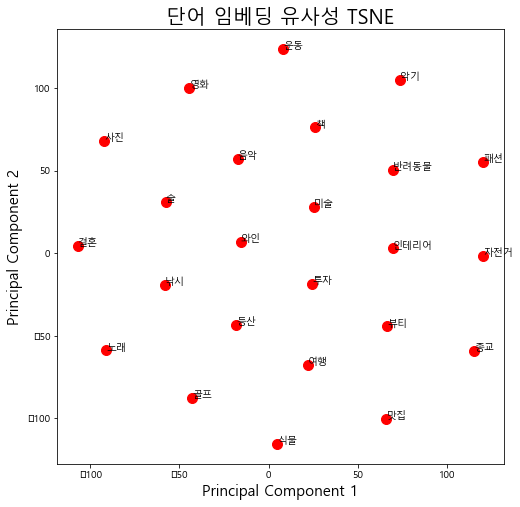

In [11]:
#ÏãúÍ∞ÅÌôî Ìï¥Î¥ÖÏãúÎãπ
import matplotlib.pyplot as pl
plt.rc("font", family="Malgun Gothic")

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Îã®Ïñ¥ ÏûÑÎ≤†Îî© Ïú†ÏÇ¨ÏÑ± TSNE', fontsize=20)

plt.scatter(tsne_vec[:,0],tsne_vec[:,1],s=100,color="red")
for i, label in enumerate(preferences):
    plt.annotate(label, (tsne_vec[i][0], tsne_vec[i][1]) )

In [12]:
pca_vec

array([[ 0.55759262, -0.4172131 ],
       [ 2.45961745, -0.32413936],
       [ 2.99650029, -0.29322744],
       [ 1.96174179,  0.13240868],
       [-0.08717483, -1.01003438],
       [ 1.39586848,  1.05616945],
       [-0.11642995, -0.55446699],
       [-0.07147375, -1.16140845],
       [-1.04581938, -1.29683687],
       [-0.28604493,  0.20356325],
       [ 0.25826476,  0.06726299],
       [-0.00833464, -1.3238642 ],
       [-0.67881954,  0.05337962],
       [-0.28924415, -0.21584411],
       [-1.11816574,  0.37313721],
       [-0.57789202, -0.53026209],
       [-1.32581607,  0.10334107],
       [-1.27053565, -0.04711272],
       [-0.79797802, -0.98041537],
       [-0.35548665,  2.15196713],
       [-0.3367502 ,  1.92775657],
       [-0.2183998 ,  0.57394626],
       [-0.4167195 ,  2.2741336 ],
       [-0.62850058, -0.76224075]])

In [13]:
#ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏßÑÌñâ
from sklearn.cluster import KMeans

#ÏµúÏ†Å Íµ∞ÏßëÏàò Ï∞æÏïÑÎÇ¥Í∏∞
inertia_li = []
for i in range(1,24):
    km = KMeans(n_clusters=i).fit(vectors)
    rlt_tsm = km.predict(vectors)
    inertia_li.append(km.inertia_)
inertia_li

[252.57715187717412,
 229.66849680243317,
 212.8461913501897,
 192.17005194616723,
 180.78615722836503,
 171.26783168011232,
 150.5575795638705,
 150.9180159882803,
 134.93817610847046,
 118.2628002443458,
 115.54443258852098,
 98.86294804684736,
 92.95944144578445,
 77.85680494587989,
 68.8246557837236,
 59.40722067051028,
 46.332943866665275,
 38.73940077128392,
 29.985281537579407,
 21.98819726540878,
 13.680942083585476,
 7.504810234583774,
 2.7226179604143557]

([<matplotlib.axis.XTick at 0x259e05194c0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

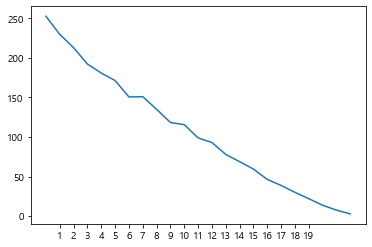

In [14]:
plt.plot(inertia_li)
plt.xticks(range(1,20))

In [15]:
n_cluster = 4
km = KMeans(n_clusters = n_cluster).fit(vectors)
rlt_tsm = km.predict(vectors)

In [45]:
vectors

[array([ 0.11430953, -0.04372846, -0.00477471, -0.2836759 ,  0.11164323,
         0.40497667,  0.23696996,  0.13167635, -0.01691398,  0.19629945,
        -0.01922369,  0.53851193, -0.24167041,  0.49195623, -0.09368172,
        -0.11611703,  0.11616112,  0.04991733, -0.174832  , -0.01862046,
         0.1811119 ,  0.32849088,  0.45174843,  0.00810585,  0.23600283,
         0.04095108,  0.17472771,  0.1303959 ,  0.15366943, -0.27974144,
        -0.16352397,  0.12329244, -0.11759178, -0.11063568,  0.38027084,
        -0.48766196,  0.18034521,  0.0604392 ,  0.04814446,  0.04068604,
         0.05473337,  0.47433665,  0.11243483, -0.04908253, -0.4032308 ,
        -0.08042647,  0.0994719 , -0.46046227, -0.03194346, -0.07423976,
         0.03007215, -0.17859626,  0.20791972, -0.0119971 , -0.3976621 ,
         0.2395773 ,  0.4089051 ,  0.27794152, -0.13137017,  0.02779211,
        -0.33134246,  0.0666974 ,  0.03611951, -0.06350014,  0.11065164,
        -0.04687299, -0.4836653 ,  0.10130499,  0.1

c:\Users\dgfs5\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


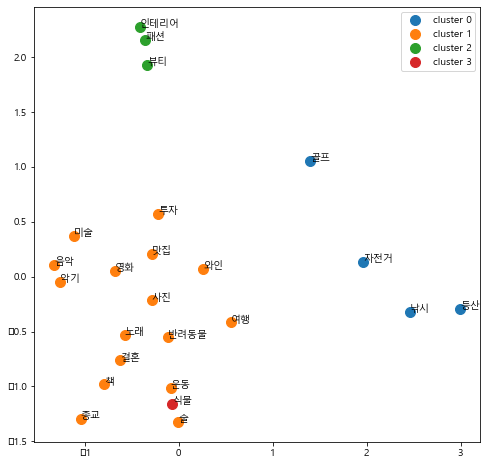

In [16]:
#ÏãúÍ∞ÅÌôî Ìï¥Î¥ÖÏãúÎãπ
import matplotlib.pyplot as pl
plt.rc("font", family="Malgun Gothic")
fig = plt.figure(figsize = (8, 8))

for i in range(n_cluster):
    label_name = "cluster " + str(i)
    plt.scatter(pca_vec[rlt_tsm == i][:,0],pca_vec[rlt_tsm == i][:,1],s=100, label = label_name)
for i, label in enumerate(preferences):
    plt.annotate(label, (pca_vec[i][0], pca_vec[i][1]))
plt.legend()

In [17]:
#Í¥ÄÏã¨ÏÇ¨ Î¶¨Ïä§Ìä∏Ïóê ÎåÄÌïú ÏûÑÎ≤†Îî© Î≤°ÌÑ∞ ÏÉùÏÑ±
embedding_matrix = np.zeros((24, 200))
embedding_matrix.shape

(24, 200)

In [18]:
preferences

['Ïó¨Ìñâ',
 'ÎÇöÏãú',
 'Îì±ÏÇ∞',
 'ÏûêÏ†ÑÍ±∞',
 'Ïö¥Îèô',
 'Í≥®ÌîÑ',
 'Î∞òÎ†§ÎèôÎ¨º',
 'ÏãùÎ¨º',
 'Ï¢ÖÍµê',
 'ÎßõÏßë',
 'ÏôÄÏù∏',
 'Ïà†',
 'ÏòÅÌôî',
 'ÏÇ¨ÏßÑ',
 'ÎØ∏Ïà†',
 'ÎÖ∏Îûò',
 'ÏùåÏïÖ',
 'ÏïÖÍ∏∞',
 'Ï±Ö',
 'Ìå®ÏÖò',
 'Î∑∞Ìã∞',
 'Ìà¨Ïûê',
 'Ïù∏ÌÖåÎ¶¨Ïñ¥',
 'Í≤∞Ìòº']

In [19]:
def get_vector(word):
    return preference_loc[word]

for i, word in enumerate(preferences):
    embedding_matrix[i] = get_vector(word)

In [20]:
#ÏûÑÎ≤†Îî© Î≤°ÌÑ∞Í∞Ä Ïûò ÎßåÎì§Ïñ¥Ï°åÎäîÏßÄ ÌôïÏù∏
embedding_matrix[23]

array([ 2.00712785e-01,  1.09802581e-01,  1.19888455e-01, -3.06543291e-01,
        2.86817849e-01, -1.14380553e-01, -1.99304417e-01, -1.21618509e-01,
        1.00625716e-01, -5.34833193e-01,  5.45972399e-03,  3.73650491e-01,
        7.05862939e-01,  6.64559826e-02,  1.43829674e-01, -2.70776182e-01,
        5.78733198e-02, -3.41771692e-01,  1.35351598e-01, -2.18056083e-01,
       -7.08934069e-02,  7.14180887e-01,  2.18957573e-01,  3.81131433e-02,
        1.89589545e-01, -1.32939696e-01, -3.88368845e-01,  5.05838618e-02,
        2.03135833e-01, -1.01564974e-01,  6.05334081e-02,  1.86597988e-01,
        2.82844342e-02, -1.56578422e-01, -1.80166543e-01, -3.77014428e-01,
        1.51093081e-01,  2.31539503e-01,  5.10174558e-02,  4.87799287e-01,
        2.91092694e-01,  6.64669871e-02, -1.16653152e-01,  3.12760621e-02,
       -8.21822807e-02,  1.91434324e-01, -1.52224243e-01,  3.22501302e-01,
        8.37059468e-02, -2.31048286e-01,  7.75344521e-02, -1.65816158e-01,
        2.38634214e-01,  

In [21]:
import pandas as pd
csvpath = os.path.join(os.getcwd(), 'testing\\data\\ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏàòÏßëÏö©(ÏùëÎãµ) - ÏÑ§Î¨∏ÏßÄ ÏùëÎãµ ÏãúÌä∏1.csv')
df = pd.read_csv(csvpath)

df

ÌÉÄÏûÑÏä§ÌÉ¨ÌîÑ Í∑ÄÌïòÏùò ÏÑ±Ìï®ÏùÄ Î¨¥ÏóáÏûÖÎãàÍπå? Í∑ÄÌïòÏùò ÏÑ±Î≥ÑÏùÄ Î¨¥ÏóáÏûÖÎãàÍπå?  \
0   2022. 5. 13 Ïò§ÌõÑ 5:23:54            Ï°∞Ïú§Ìñâ             ÎÇ®Ïûê   
1   2022. 5. 13 Ïò§ÌõÑ 5:24:09            ÏµúÎëêÎ¥â             ÎÇ®Ïûê   
2   2022. 5. 13 Ïò§ÌõÑ 5:24:19            Î∞ïÍ≤ΩÍµ≠             ÎÇ®Ïûê   
3   2022. 5. 13 Ïò§ÌõÑ 5:24:33            ÌïúÏäπÌö®             Ïó¨Ïûê   
4   2022. 5. 13 Ïò§ÌõÑ 5:27:30            Î∞ïÏû¨Ìòï             ÎÇ®Ïûê   
5   2022. 5. 13 Ïò§ÌõÑ 5:28:18            Ïù¥ÌÉúÏö∞             ÎÇ®Ïûê   
6   2022. 5. 13 Ïò§ÌõÑ 5:31:06             ÏïàÎÇò             Ïó¨Ïûê   
7   2022. 5. 13 Ïò§ÌõÑ 5:31:20            ÍπÄÌòúÏàò             Ïó¨Ïûê   
8   2022. 5. 13 Ïò§ÌõÑ 5:33:09            Í∞ïÎØ∏Îùº             Ïó¨Ïûê   
9   2022. 5. 13 Ïò§ÌõÑ 5:34:58            Ï†ïÌò∏ÏòÅ             ÎÇ®Ïûê   
10  2022. 5. 13 Ïò§ÌõÑ 5:38:34            Ïú†Ïã†ÏòÅ             ÎÇ®Ïûê   
11  2022. 5. 13 Ïò§ÌõÑ 5:42:47            Î∞ïÎ≥ëÏ∞¨             ÎÇ®Ïûê   
12  2022. 5. 13 Ïò§ÌõÑ 5:45:45            Ïù¥ÏßÄÏùÄ             Ïó¨Ïûê   
13  2022. 5. 13 Ïò§ÌõÑ 5:50:54            Ï†ÑÏÉÅÏñ∏             ÎÇ®Ïûê   
14  2022. 5. 13 Ïò§ÌõÑ 5:57:02            ÍπÄÏßÄÏòÅ             Ïó¨Ïûê   
15  2022. 5. 13 Ïò§ÌõÑ 6:05:03            ÏûÑÎ≥ëÏú§             ÎÇ®Ïûê   
16  2022. 5. 13 Ïò§ÌõÑ 6:45:58            Ï†úÏù¥Îì†             ÎÇ®Ïûê   
17  2022. 5. 13 Ïò§ÌõÑ 6:47:55            Ïù¥ÎèôÏóΩ             ÎÇ®Ïûê   
18  2022. 5. 13 Ïò§ÌõÑ 6:52:09            Ï†ÑÏÉÅÌÉù             ÎÇ®Ïûê   
19  2022. 5. 14 Ïò§ÌõÑ 6:31:09            Ïû•ÏõêÏÑú             ÎÇ®Ïûê   

   Í∞ÄÏû• Í¥ÄÏã¨ÏûàÎäî 3Í∞ÄÏßÄÎ•º ÏÑ†ÌÉùÌï¥Ï£ºÏÑ∏Ïöî. [1ÏàúÏúÑ] Í∞ÄÏû• Í¥ÄÏã¨ÏûàÎäî 3Í∞ÄÏßÄÎ•º ÏÑ†ÌÉùÌï¥Ï£ºÏÑ∏Ïöî. [2ÏàúÏúÑ]  \
0                          ÏùåÏïÖ                         ÎÖ∏Îûò   
1                          Ïö¥Îèô                          Ïà†   
2                          Ïö¥Îèô                         ÏùåÏïÖ   
3                          ÏÇ¨ÏßÑ                          Ïà†   
4                          Ïö¥Îèô                         ÎßõÏßë   
5                          Ìà¨Ïûê                          Ïà†   
6                           Ï±Ö                         ÎßõÏßë   
7                          Ïó¨Ìñâ                        ÏûêÏ†ÑÍ±∞   
8                          Ïó¨Ìñâ                       Î∞òÎ†§ÎèôÎ¨º   
9                          ÏÇ¨ÏßÑ                         ÏùåÏïÖ   
10                         Ïö¥Îèô                         Ìå®ÏÖò   
11                         ÎÖ∏Îûò                         Ìå®ÏÖò   
12                          Ï±Ö                          Ï±Ö   
13                         ÎßõÏßë                         ÏÇ¨ÏßÑ   
14                       Î∞òÎ†§ÎèôÎ¨º                         ÏÇ¨ÏßÑ   
15                         Ìà¨Ïûê                         ÏòÅÌôî   
16                         Ìà¨Ïûê                          Ï±Ö   
17                         Ìà¨Ïûê                         Í≤∞Ìòº   
18                         Ïó¨Ìñâ                          Ïà†   
19                         ÏòÅÌôî                         Ïö¥Îèô   

   Í∞ÄÏû• Í¥ÄÏã¨ÏûàÎäî 3Í∞ÄÏßÄÎ•º ÏÑ†ÌÉùÌï¥Ï£ºÏÑ∏Ïöî. [3ÏàúÏúÑ] Í∑ÄÌïòÏùò Í±∞Ï£ºÏßÄÏó≠ÏùÄ Ïñ¥ÎîîÏûÖÎãàÍπå?                 Í∑ÄÌïòÏùò Ï¢ÖÍµêÎäî Î¨¥ÏóáÏûÖÎãàÍπå?  \
0                          Ïö¥Îèô            ÏÑúÏö∏ÌäπÎ≥ÑÏãú                             Î¨¥Íµê   
1                          ÎßõÏßë            Ïö∏ÏÇ∞Í¥ëÏó≠Ïãú                             Î¨¥Íµê   
2                           Ï±Ö            ÏÑúÏö∏ÌäπÎ≥ÑÏãú                             Î¨¥Íµê   
3                          Ïó¨Ìñâ            ÏÑúÏö∏ÌäπÎ≥ÑÏãú                             Î¨¥Íµê   
4                           Ïà†              Í≤ΩÍ∏∞ÎèÑ                             Î¨¥Íµê   
5                          ÏòÅÌôî              Í≤ΩÍ∏∞ÎèÑ                             Î¨¥Íµê   
6                          ÎØ∏Ïà†            ÏÑúÏö∏ÌäπÎ≥ÑÏãú                            Í∏∞ÎèÖÍµê   
7                          Îì±ÏÇ∞            ÏÑúÏö∏ÌäπÎ≥ÑÏãú                            ÏóÜÏñ¥Ïöî  

In [22]:
#ÌïÑÏöîÌïú Î∂ÄÎ∂ÑÎßå Í∞ÄÏ†∏Ïò§Í∏∞
df = df.iloc[:,1:6]
df

Í∑ÄÌïòÏùò ÏÑ±Ìï®ÏùÄ Î¨¥ÏóáÏûÖÎãàÍπå? Í∑ÄÌïòÏùò ÏÑ±Î≥ÑÏùÄ Î¨¥ÏóáÏûÖÎãàÍπå? Í∞ÄÏû• Í¥ÄÏã¨ÏûàÎäî 3Í∞ÄÏßÄÎ•º ÏÑ†ÌÉùÌï¥Ï£ºÏÑ∏Ïöî. [1ÏàúÏúÑ]  \
0             Ï°∞Ïú§Ìñâ             ÎÇ®Ïûê                         ÏùåÏïÖ   
1             ÏµúÎëêÎ¥â             ÎÇ®Ïûê                         Ïö¥Îèô   
2             Î∞ïÍ≤ΩÍµ≠             ÎÇ®Ïûê                         Ïö¥Îèô   
3             ÌïúÏäπÌö®             Ïó¨Ïûê                         ÏÇ¨ÏßÑ   
4             Î∞ïÏû¨Ìòï             ÎÇ®Ïûê                         Ïö¥Îèô   
5             Ïù¥ÌÉúÏö∞             ÎÇ®Ïûê                         Ìà¨Ïûê   
6              ÏïàÎÇò             Ïó¨Ïûê                          Ï±Ö   
7             ÍπÄÌòúÏàò             Ïó¨Ïûê                         Ïó¨Ìñâ   
8             Í∞ïÎØ∏Îùº             Ïó¨Ïûê                         Ïó¨Ìñâ   
9             Ï†ïÌò∏ÏòÅ             ÎÇ®Ïûê                         ÏÇ¨ÏßÑ   
10            Ïú†Ïã†ÏòÅ             ÎÇ®Ïûê                         Ïö¥Îèô   
11            Î∞ïÎ≥ëÏ∞¨             ÎÇ®Ïûê                         ÎÖ∏Îûò   
12            Ïù¥ÏßÄÏùÄ             Ïó¨Ïûê                          Ï±Ö   
13            Ï†ÑÏÉÅÏñ∏             ÎÇ®Ïûê                         ÎßõÏßë   
14            ÍπÄÏßÄÏòÅ             Ïó¨Ïûê                       Î∞òÎ†§ÎèôÎ¨º   
15            ÏûÑÎ≥ëÏú§             ÎÇ®Ïûê                         Ìà¨Ïûê   
16            Ï†úÏù¥Îì†             ÎÇ®Ïûê                         Ìà¨Ïûê   
17            Ïù¥ÎèôÏóΩ             ÎÇ®Ïûê                         Ìà¨Ïûê   
18            Ï†ÑÏÉÅÌÉù             ÎÇ®Ïûê                         Ïó¨Ìñâ   
19            Ïû•ÏõêÏÑú             ÎÇ®Ïûê                         ÏòÅÌôî   

   Í∞ÄÏû• Í¥ÄÏã¨ÏûàÎäî 3Í∞ÄÏßÄÎ•º ÏÑ†ÌÉùÌï¥Ï£ºÏÑ∏Ïöî. [2ÏàúÏúÑ] Í∞ÄÏû• Í¥ÄÏã¨ÏûàÎäî 3Í∞ÄÏßÄÎ•º ÏÑ†ÌÉùÌï¥Ï£ºÏÑ∏Ïöî. [3ÏàúÏúÑ]  
0                          ÎÖ∏Îûò                         Ïö¥Îèô  
1                           Ïà†                         ÎßõÏßë  
2                          ÏùåÏïÖ                          Ï±Ö  
3                           Ïà†                         Ïó¨Ìñâ  
4                          ÎßõÏßë                          Ïà†  
5                           Ïà†                         ÏòÅÌôî  
6                          ÎßõÏßë                         ÎØ∏Ïà†  
7                         ÏûêÏ†ÑÍ±∞                         Îì±ÏÇ∞  
8                        Î∞òÎ†§ÎèôÎ¨º                         ÏãùÎ¨º  
9                          ÏùåÏïÖ                         Ìà¨Ïûê  
10                         Ìå®ÏÖò                         Ìà¨Ïûê  
11                         Ìå®ÏÖò                         Ìà¨Ïûê  
12                          Ï±Ö                          Ï±Ö  
13                         ÏÇ¨ÏßÑ                         Ìà¨Ïûê  
14                         ÏÇ¨ÏßÑ                         Ïó¨Ìñâ  
15                         ÏòÅÌôî                         ÎßõÏßë  
16                          Ï±Ö                         Ïó¨Ìñâ  
17                         Í≤∞Ìòº                         Ìå®ÏÖò  
18                          Ïà†                         ÏòÅÌôî  
19                         Ïö¥Îèô                        ÏûêÏ†ÑÍ±∞

In [23]:
old_columns = df.columns
new_columns = [
    'name', 'sex', 'preference1', 'preference2', 'preference3'
]
rename_dict = {}
for old, new in zip(old_columns, new_columns):
    rename_dict[old] = new

df.rename(columns=rename_dict, inplace= True)

df.iloc[:, 1:]

C:\Users\dgfs5\AppData\Local\Temp\ipykernel_34620\459274501.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=rename_dict, inplace= True)


sex preference1 preference2 preference3
0   ÎÇ®Ïûê          ÏùåÏïÖ          ÎÖ∏Îûò          Ïö¥Îèô
1   ÎÇ®Ïûê          Ïö¥Îèô           Ïà†          ÎßõÏßë
2   ÎÇ®Ïûê          Ïö¥Îèô          ÏùåÏïÖ           Ï±Ö
3   Ïó¨Ïûê          ÏÇ¨ÏßÑ           Ïà†          Ïó¨Ìñâ
4   ÎÇ®Ïûê          Ïö¥Îèô          ÎßõÏßë           Ïà†
5   ÎÇ®Ïûê          Ìà¨Ïûê           Ïà†          ÏòÅÌôî
6   Ïó¨Ïûê           Ï±Ö          ÎßõÏßë          ÎØ∏Ïà†
7   Ïó¨Ïûê          Ïó¨Ìñâ         ÏûêÏ†ÑÍ±∞          Îì±ÏÇ∞
8   Ïó¨Ïûê          Ïó¨Ìñâ        Î∞òÎ†§ÎèôÎ¨º          ÏãùÎ¨º
9   ÎÇ®Ïûê          ÏÇ¨ÏßÑ          ÏùåÏïÖ          Ìà¨Ïûê
10  ÎÇ®Ïûê          Ïö¥Îèô          Ìå®ÏÖò          Ìà¨Ïûê
11  ÎÇ®Ïûê          ÎÖ∏Îûò          Ìå®ÏÖò          Ìà¨Ïûê
12  Ïó¨Ïûê           Ï±Ö           Ï±Ö           Ï±Ö
13  ÎÇ®Ïûê          ÎßõÏßë          ÏÇ¨ÏßÑ          Ìà¨Ïûê
14  Ïó¨Ïûê        Î∞òÎ†§ÎèôÎ¨º          ÏÇ¨ÏßÑ          Ïó¨Ìñâ
15  ÎÇ®Ïûê          Ìà¨Ïûê          ÏòÅÌôî          ÎßõÏßë
16  ÎÇ®Ïûê          Ìà¨Ïûê           Ï±Ö          Ïó¨Ìñâ
17  ÎÇ®Ïûê          Ìà¨Ïûê          Í≤∞Ìòº          Ìå®ÏÖò
18  ÎÇ®Ïûê          Ïó¨Ìñâ           Ïà†          ÏòÅÌôî
19  ÎÇ®Ïûê          ÏòÅÌôî          Ïö¥Îèô         ÏûêÏ†ÑÍ±∞

In [24]:
for i in range(1,4):
    df[f'preference{i}'] = df[f'preference{i}'].apply(lambda x: preferences.index(x))

C:\Users\dgfs5\AppData\Local\Temp\ipykernel_34620\1138926837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'preference{i}'] = df[f'preference{i}'].apply(lambda x: preferences.index(x))


In [25]:
df.iloc[:, 1:]

sex  preference1  preference2  preference3
0   ÎÇ®Ïûê           16           15            4
1   ÎÇ®Ïûê            4           11            9
2   ÎÇ®Ïûê            4           16           18
3   Ïó¨Ïûê           13           11            0
4   ÎÇ®Ïûê            4            9           11
5   ÎÇ®Ïûê           21           11           12
6   Ïó¨Ïûê           18            9           14
7   Ïó¨Ïûê            0            3            2
8   Ïó¨Ïûê            0            6            7
9   ÎÇ®Ïûê           13           16           21
10  ÎÇ®Ïûê            4           19           21
11  ÎÇ®Ïûê           15           19           21
12  Ïó¨Ïûê           18           18           18
13  ÎÇ®Ïûê            9           13           21
14  Ïó¨Ïûê            6           13            0
15  ÎÇ®Ïûê           21           12            9
16  ÎÇ®Ïûê           21           18            0
17  ÎÇ®Ïûê           21           23           19
18  ÎÇ®Ïûê            0           11           12
19  ÎÇ®Ïûê           12            4            3

In [26]:
def make_matrix(df):
    temp_dict = {}
    for i in df.index:
        person_matrix = np.zeros((3,200))
        for j in range(1,4):
            prefer = df.iloc[i][f'preference{j}']
            person_matrix[j-1] = embedding_matrix[prefer]
        temp_dict[df.iloc[i]['name']] = np.average(person_matrix, weights=[0.5,0.3,0.2], axis= 0).reshape((1,-1))
    return temp_dict

person = make_matrix(df)

In [27]:
person['Ï°∞Ïú§Ìñâ'].shape

(1, 200)

In [28]:
from sklearn.metrics.pairwise import cosine_similarity

class similarity():
    def __init__(self, person_matrix):
        self.person_matrix = person_matrix

    def get_similarity(self, name1):
        temp_dict = {}
        for name in person:
            if name == name1:
                continue
            else:
                temp_dict[name] = cosine_similarity(person[name1], person[name])
            
        return temp_dict


In [29]:
test = similarity(person)
test.get_similarity('Ïú†Ïã†ÏòÅ')

{'Ï°∞Ïú§Ìñâ': array([[0.54070382]]),
 'ÏµúÎëêÎ¥â': array([[0.73694139]]),
 'Î∞ïÍ≤ΩÍµ≠': array([[0.79243546]]),
 'ÌïúÏäπÌö®': array([[0.32341735]]),
 'Î∞ïÏû¨Ìòï': array([[0.77687558]]),
 'Ïù¥ÌÉúÏö∞': array([[0.53606752]]),
 'ÏïàÎÇò': array([[0.49233474]]),
 'ÍπÄÌòúÏàò': array([[0.42337798]]),
 'Í∞ïÎØ∏Îùº': array([[0.36655563]]),
 'Ï†ïÌò∏ÏòÅ': array([[0.50006914]]),
 'Î∞ïÎ≥ëÏ∞¨': array([[0.61928281]]),
 'Ïù¥ÏßÄÏùÄ': array([[0.29071549]]),
 'Ï†ÑÏÉÅÏñ∏': array([[0.50749874]]),
 'ÍπÄÏßÄÏòÅ': array([[0.38067603]]),
 'ÏûÑÎ≥ëÏú§': array([[0.58961058]]),
 'Ï†úÏù¥Îì†': array([[0.5916697]]),
 'Ïù¥ÎèôÏóΩ': array([[0.65327271]]),
 'Ï†ÑÏÉÅÌÉù': array([[0.39566051]]),
 'Ïû•ÏõêÏÑú': array([[0.69881963]])}

In [30]:
float(np.array([[0.6]]))

0.6

In [31]:
#ÎèôÍ∏∞ ÏÑ†Ìò∏ÎèÑ Ï†úÏûë ÏΩîÎìú
# names = list(df['name'])
# preference_dict = {}

# for n in names:
#     simil = test.get_similarity(n)
#     max_sim = max(simil.values())
#     for i, j in simil.items():
#         if j == max_sim:
#             if n == 'Ï†úÏù¥Îì†':
#                 preference_dict['Ïù¥Ïû¨Ìò∏'] = (i,int(round(float(j), 2)*100))
#             else:
#                 preference_dict[n] = (i,int(round(float(j), 2)*100))


In [32]:
cosine_similarity(person['Ï°∞Ïú§Ìñâ'], person['Î∞ïÎ≥ëÏ∞¨'])

array([[0.74304438]])